In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
file_path = '/content/drive/My Drive/Custom_CNN_Features.csv'
data = pd.read_csv(file_path)

In [4]:
print(data.head())

     Filename  Class Label          f0   f1   f2   f3   f4   f5         f6  \
0       1.png            2   50.557468  0.0  0.0  0.0  0.0  0.0   0.000000   
1  10.jpg.png            2  125.256027  0.0  0.0  0.0  0.0  0.0  48.989120   
2      10.png            2   50.160606  0.0  0.0  0.0  0.0  0.0   0.000000   
3     100.png            2   63.720730  0.0  0.0  0.0  0.0  0.0   0.000000   
4   10091.jpg            2   64.484604  0.0  0.0  0.0  0.0  0.0  37.368713   

   f7  ...         f190  f191         f192         f193         f194  f195  \
0   0  ...   316.271667   0.0   239.577011   277.834534   205.776398   0.0   
1   0  ...  1317.333740   0.0  1000.075012  1118.496948  1030.366699   0.0   
2   0  ...   330.470978   0.0   251.886398   288.062134   220.889481   0.0   
3   0  ...   442.839233   0.0   345.145599   389.100678   304.433990   0.0   
4   0  ...   835.147400   0.0   649.643616   693.101868   690.640564   0.0   

   f196  f197  f198        f199  
0   0.0   0.0   0.0   91.438

In [5]:
print(data.dtypes)

Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object


In [6]:
print(data.isnull().sum())

Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64


In [9]:
print(data['Class Label'].value_counts())

Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
import numpy as np

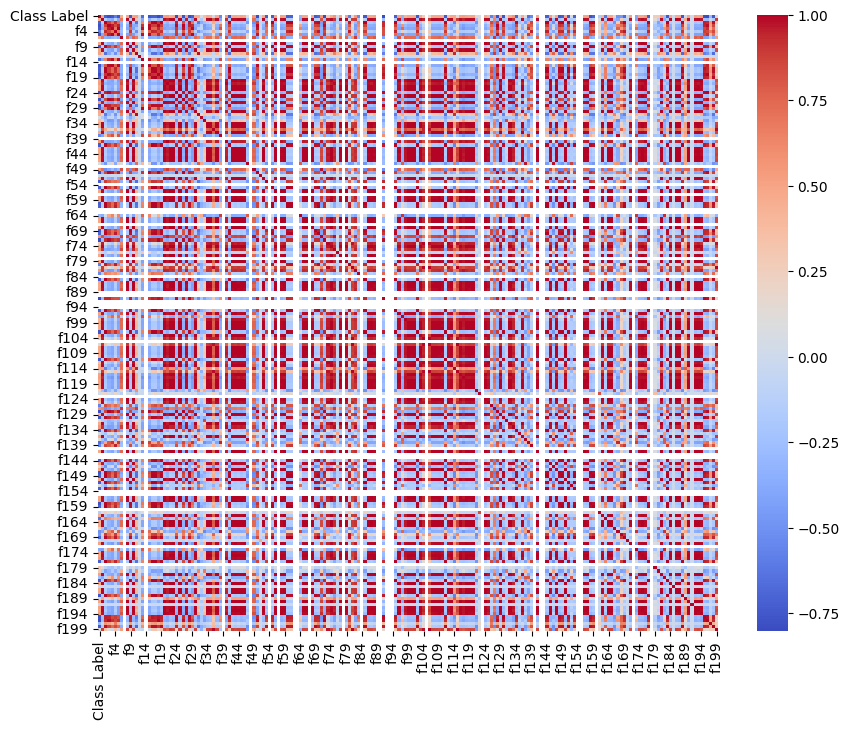

In [14]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

In [16]:
numeric_data = data.select_dtypes(include=[np.number])
rank = np.linalg.matrix_rank(numeric_data.values)
print("Rank of the matrix:", rank)

Rank of the matrix: 175


In [17]:
print(numeric_data.describe())
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)
normalized_data = pd.DataFrame(normalized_data, columns=numeric_data.columns)
print(normalized_data.head())

       Class Label           f0           f1           f2           f3  \
count  3253.000000  3253.000000  3253.000000  3253.000000  3253.000000   
mean      0.849062    17.516938    57.919104   112.822180   170.829473   
std       0.689245    54.948034    93.672074    96.561850   124.512873   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000    46.988506    85.638191   
50%       1.000000     0.000000     0.000000    93.278381   160.636246   
75%       1.000000     0.000000   117.704697   159.855179   248.145508   
max       2.000000   781.789490   459.207794   536.879639   760.753845   

                f4           f5           f6      f7            f8  ...  \
count  3253.000000  3253.000000  3253.000000  3253.0   3253.000000  ...   
mean     17.606476   141.614480    11.035532     0.0    214.312125  ...   
std      35.626627    99.128478    20.554964     0.0    738.811309  ...   
min       0.000000     0.000000  

In [18]:
from sklearn.model_selection import train_test_split
X = normalized_data.drop('Class Label', axis=1)
y = data['Class Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (2439, 200)
Test set size: (814, 200)


In [21]:
results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    if hasattr(clf, "predict_proba"):
        y_probs = clf.predict_proba(X_test)
    else:
        y_probs = clf.decision_function(X_test)
        if name == "Support Vector Machine":
            y_probs = (y_probs - y_probs.min()) / (y_probs.max() - y_probs.min())

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    try:
        auroc = roc_auc_score(y_test_binarized, y_probs, multi_class='ovr', average='weighted')
    except ValueError:
        auroc = "Not Applicable for Binary Classification with this Method"

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUROC': auroc
    }

# Print the results for all classifiers
for name, metrics in results.items():
    print(f"Results for {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")


Results for K-Nearest Neighbors:
Accuracy: 0.9349
Precision: 0.9371
Recall: 0.9349
F1 Score: 0.9350
AUROC: 0.2758


Results for Decision Tree:
Accuracy: 0.9238
Precision: 0.9247
Recall: 0.9238
F1 Score: 0.9239
AUROC: 0.2817


Results for Support Vector Machine:
Accuracy: 0.9312
Precision: 0.9345
Recall: 0.9312
F1 Score: 0.9314
AUROC: 0.3272


Results for Random Forest:
Accuracy: 0.9361
Precision: 0.9383
Recall: 0.9361
F1 Score: 0.9362
AUROC: 0.2704


Results for Naïve Bayes:
Accuracy: 0.9226
Precision: 0.9240
Recall: 0.9226
F1 Score: 0.9228
AUROC: 0.3127


